In [1]:
import numpy as np

theta_k = 58
theta_p = 45
tk = theta_k * np.pi / 180
tp = theta_p * np.pi / 180
phase = 0
kai = 0

C_0 = (np.sqrt(3/2))*(1/3) * np.array([[-1,  0, 0],
                        [ 0, -1, 0],
                        [ 0,  0, 2]], dtype=complex)

C_p1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,  -1],
                                  [ 0,   0,  1j],
                                  [-1,  1j,   0]], dtype=complex)

C_n1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,   1],
                                  [ 0,   0,  1j],
                                  [ 1,  1j,   0]], dtype=complex)

C_p2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   -1j, 0],
                                  [-1j,  -1,  0],
                                  [ 0,    0,  0]], dtype=complex)

C_n2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   1j,  0],
                                  [1j,   -1,  0],
                                  [ 0,    0,  0]], dtype=complex)

C = [C_n2, C_n1, C_0, C_p1, C_p2]
g = np.zeros(5, dtype=complex)

e_ll = np.array([np.cos(tp)*np.cos(tk),
                 np.sin(tp),
                 -np.cos(tp)*np.sin(tk)], dtype=complex)

e_T = np.array([-np.sin(tp)*np.cos(tk),
                 np.cos(tp),
                 np.sin(tp)*np.sin(tk)], dtype=complex)

k = np.array([np.sin(tk), 0, np.cos(tk)], dtype=complex)

for q in range(5):
    for i in range(3):
        for j in range(3):
            print(q,i,j,C[q][i, j])
            g[q] += C[q][i, j] * (
                e_ll[i]*np.cos(kai) +
                e_T[i]*np.sin(kai)*np.exp((i+1)*phase)
            ) * k[j]

print("g =", g)


0 0 0 (0.5+0j)
0 0 1 0.5j
0 0 2 0j
0 1 0 0.5j
0 1 1 (-0.5+0j)
0 1 2 0j
0 2 0 0j
0 2 1 0j
0 2 2 0j
1 0 0 0j
1 0 1 0j
1 0 2 (0.5+0j)
1 1 0 0j
1 1 1 0j
1 1 2 0.5j
1 2 0 (0.5+0j)
1 2 1 0.5j
1 2 2 0j
2 0 0 (-0.40824829046386296+0j)
2 0 1 0j
2 0 2 0j
2 1 0 0j
2 1 1 (-0.40824829046386296+0j)
2 1 2 0j
2 2 0 0j
2 2 1 0j
2 2 2 (0.8164965809277259+0j)
3 0 0 0j
3 0 1 0j
3 0 2 (-0.5+0j)
3 1 0 0j
3 1 1 0j
3 1 2 0.5j
3 2 0 (-0.5+0j)
3 2 1 0.5j
3 2 2 0j
4 0 0 (0.5+0j)
4 0 1 -0.5j
4 0 2 0j
4 1 0 -0.5j
4 1 1 (-0.5+0j)
4 1 2 0j
4 2 0 0j
4 2 1 0j
4 2 2 0j
g = [ 0.15888584+0.29983028j -0.15498761+0.18735475j -0.38918924+0.j
  0.15498761+0.18735475j  0.15888584-0.29983028j]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

theta_k_array = np.linspace(0, 90, 100) 
theta_p_array = np.linspace(0, 90, 100)


TK, TP = np.meshgrid(theta_k_array, theta_p_array)

# Convert angles from degrees to radians
tk = TK * np.pi / 180
tp = TP * np.pi / 180
phase = 0
kai = 0

C_0 = (np.sqrt(3/2))*(1/3) * np.array([[-1,  0, 0],
                        [ 0, -1, 0],
                        [ 0,  0, 2]], dtype=complex)

C_p1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,  -1],
                                  [ 0,   0,  1j],
                                  [-1,  1j,   0]], dtype=complex)

C_n1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,   1],
                                  [ 0,   0,  1j],
                                  [ 1,  1j,   0]], dtype=complex)

C_p2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   -1j, 0],
                                  [-1j,  -1,  0],
                                  [ 0,    0,  0]], dtype=complex)

C_n2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   1j,  0],
                                  [1j,   -1,  0],
                                  [ 0,    0,  0]], dtype=complex)

C = [C_n2, C_n1, C_0, C_p1, C_p2]

g = np.zeros((5, len(theta_p_array), len(theta_k_array)), dtype=complex)


for idx_p, tp_val in enumerate(tp[:,0]):
    for idx_k, tk_val in enumerate(tk[0,:]):

        e_ll = np.array([np.cos(tp_val)*np.cos(tk_val),
                         np.sin(tp_val),
                         -np.cos(tp_val)*np.sin(tk_val)], dtype=complex)

        e_T = np.array([-np.sin(tp_val)*np.cos(tk_val),
                         np.cos(tp_val),
                         np.sin(tp_val)*np.sin(tk_val)], dtype=complex)

        k_vec = np.array([np.sin(tk_val), 0, np.cos(tk_val)], dtype=complex)

        for q in range(5):
            temp_g = 0+0j
            for i in range(3):
                for j in range(3):
                    temp_g += C[q][i, j] * (
                        e_ll[i]*np.cos(kai) +
                        e_T[i]*np.sin(kai)*np.exp(1j*phase)
                    ) * k_vec[j]
            g[q, idx_p, idx_k] = np.abs(temp_g)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define theta arrays and create meshgrid
theta_k_array = np.linspace(0, 90, 100)  # in degrees
theta_p_array = np.linspace(0, 90, 100)  # in degrees

TK, TP = np.meshgrid(theta_k_array, theta_p_array)

# Convert angles from degrees to radians
tk = TK * np.pi / 180
tp = TP * np.pi / 180

# Set phase and kai values
phase = 0
kai = 0

# Initialize the g array
g = np.zeros((5, len(theta_p_array), len(theta_k_array)), dtype=complex)

# Iterate over the grid points
for idx_p, tp_val in enumerate(tp[:, 0]):
    for idx_k, tk_val in enumerate(tk[0, :]):

        # Equation g_0
        g[2, idx_p, idx_k] = -np.sqrt(3 / 2) * np.cos(tk_val) * np.sin(tk_val) * (
            np.cos(tp_val) * np.cos(kai) - np.exp(1j * phase) * np.sin(tp_val) * np.sin(kai)
        )

        # Equation g_p1
        g[3, idx_p, idx_k] = 0.5 * (
            np.cos(kai) * (-np.cos(2 * tk_val) * np.cos(tp_val) + 1j * np.cos(tk_val) * np.sin(tp_val)) +
            np.exp(1j * phase) * (1j * np.cos(tk_val) * np.cos(tp_val) + np.cos(2 * tk_val) * np.sin(tp_val)) * np.sin(kai)
        )

        # Equation g_n1
        g[1, idx_p, idx_k] = 0.5 * (
            np.cos(kai) * (np.cos(2 * tk_val) * np.cos(tp_val) + 1j * np.cos(tk_val) * np.sin(tp_val)) +
            1j * np.exp(1j * phase) * (np.cos(tk_val) * np.cos(tp_val) + 1j * np.cos(2 * tk_val) * np.sin(tp_val)) * np.sin(kai)
        )

        # Equation g_p2
        g[4, idx_p, idx_k] = 0.5 * np.sin(tk_val) * (
            np.cos(kai) * (np.cos(tk_val) * np.cos(tp_val) - 1j * np.sin(tp_val)) +
            (-1j * np.cos(phase) + np.sin(phase)) * (np.cos(tp_val) - 1j * np.cos(tk_val) * np.sin(tp_val)) * np.sin(kai)
        )

        # Equation g_n2
        g[0, idx_p, idx_k] = 0.5 * np.sin(tk_val) * (
            np.cos(kai) * (np.cos(tk_val) * np.cos(tp_val) + 1j * np.sin(tp_val)) +
            1j * np.exp(1j * phase) * (np.cos(tp_val) + 1j * np.cos(tk_val) * np.sin(tp_val)) * np.sin(kai)
        )



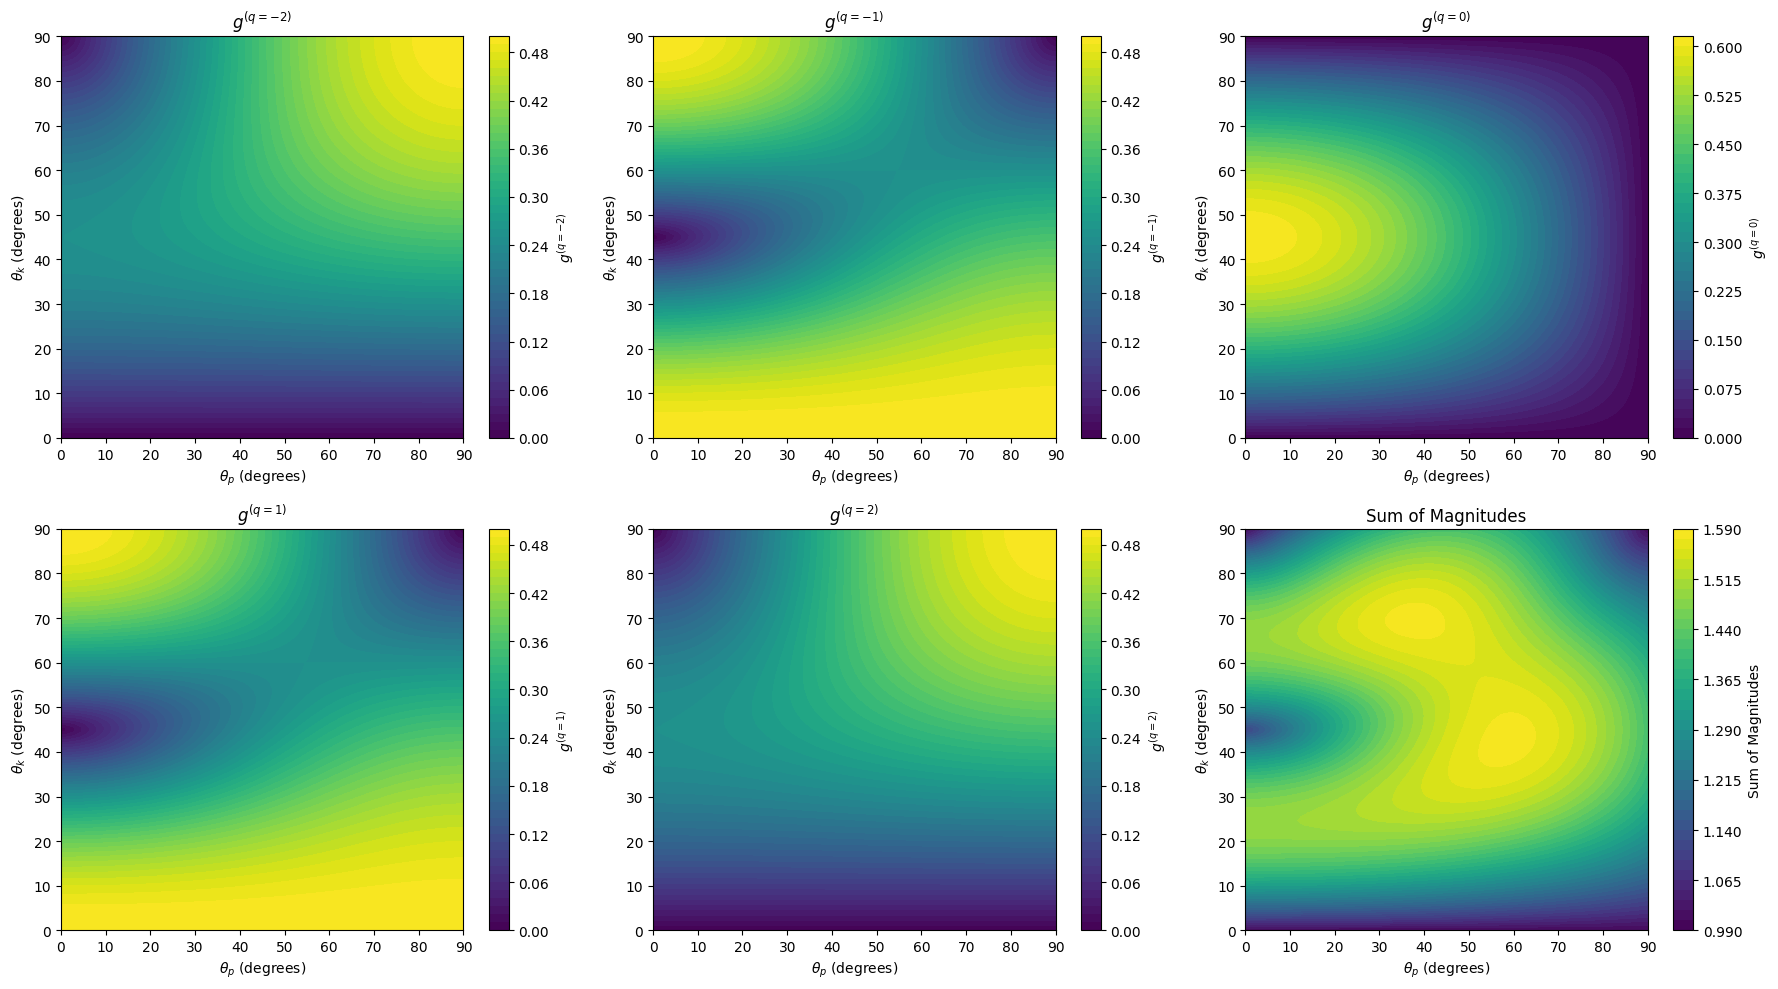

In [7]:
# Plotting the magnitude of each element in g in a single figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

g_label = [r'$g^{(q = -2)}$', r'$g^{(q = -1)}$', r'$g^{(q = 0)}$', r'$g^{(q = 1)}$', r'$g^{(q = 2)}$', r'Sum of Magnitudes']
axs = axs.flatten()

for q in range(5):
    # Compute the magnitude of g[q]
    magnitude = np.abs(g[q, :, :]) 

    # Create a contour plot
    cp = axs[q].contourf(TP, TK, magnitude, levels=50, cmap='viridis')
    fig.colorbar(cp, ax=axs[q], label=g_label[q])
    axs[q].set_title(g_label[q])
    axs[q].set_xlabel(r'$\theta_p$ (degrees)')
    axs[q].set_ylabel(r'$\theta_k$ (degrees)')
    # Optionally, add grid lines
    # axs[q].grid(True)

# Calculate the sum of magnitudes for the sixth plot
sum_magnitude = np.sum(np.abs(g), axis=0)

# Create the sixth plot for the sum of magnitudes
cp = axs[5].contourf(TP, TK, sum_magnitude, levels=50, cmap='viridis')
fig.colorbar(cp, ax=axs[5], label=g_label[5])
axs[5].set_title(g_label[5])
axs[5].set_xlabel(r'$\theta_p$ (degrees)')
axs[5].set_ylabel(r'$\theta_k$ (degrees)')

plt.tight_layout()
plt.show()


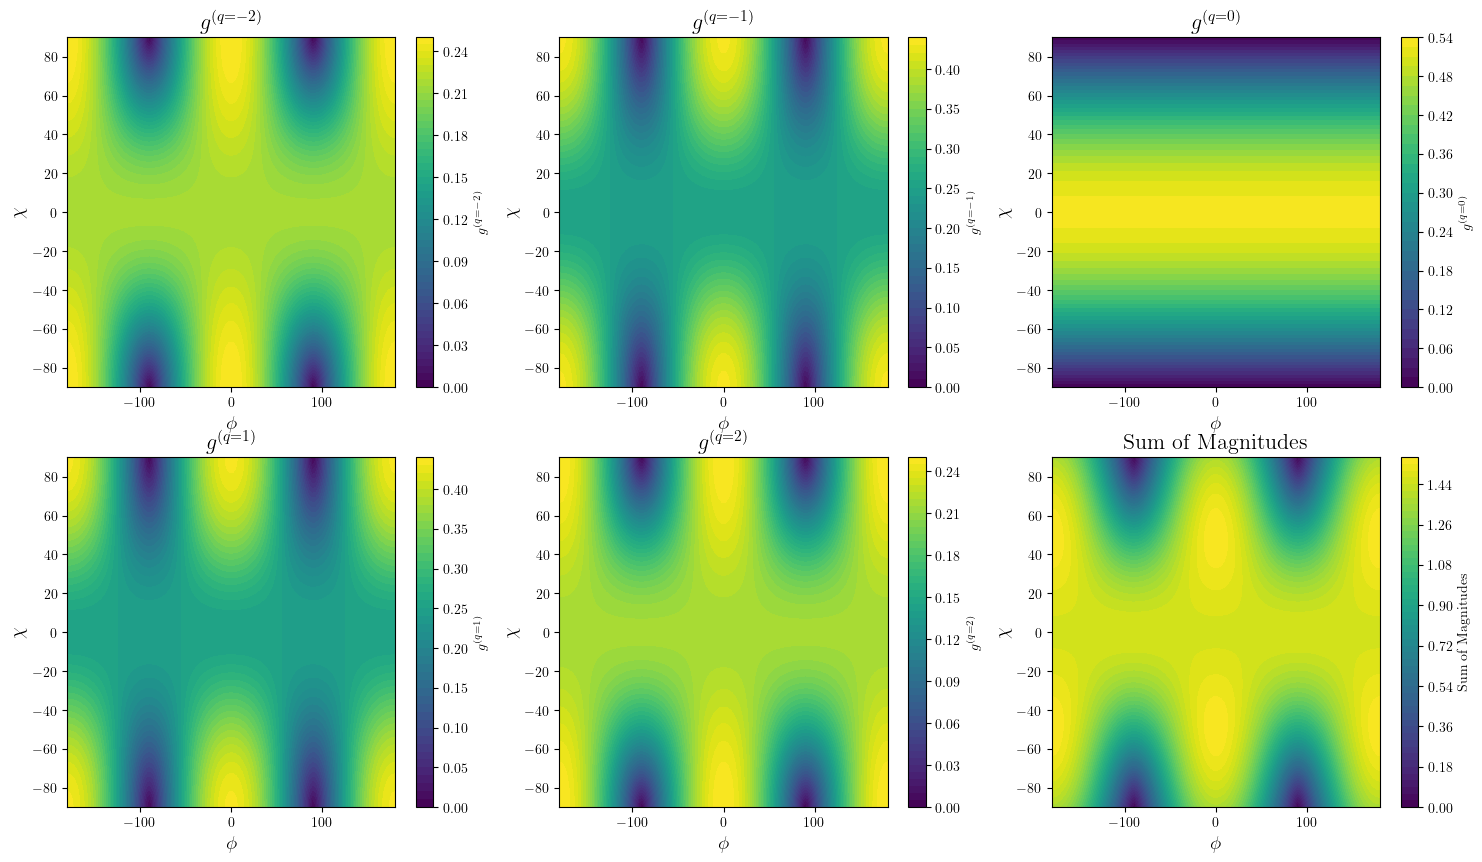

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams

# Use LaTeX-style fonts
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Set constant theta_k and theta_p values
theta_k = 30 * np.pi / 180  # e.g., 45 degrees in radians

# Define phase and kai arrays for varying
phase_array = np.linspace(-np.pi,  np.pi, 100)  # phase from 0 to 2π
kai_array = np.linspace(-np.pi/2,  np.pi/2, 100)    # kai from 0 to 2π

# Create meshgrid for phase and kai
Phase, Kai = np.meshgrid(phase_array, kai_array)

# Initialize g with complex zeros
g = np.zeros((5, len(kai_array), len(phase_array)), dtype=complex)

# Define C matrices
C_0 = (np.sqrt(3/2))*(1/3) * np.array([[-1,  0, 0],
                                       [ 0, -1, 0],
                                       [ 0,  0, 2]], dtype=complex)

C_p1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,  -1],
                                                [ 0,   0,  1j],
                                                [-1,  1j,   0]], dtype=complex)

C_n1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,   1],
                                                [ 0,   0,  1j],
                                                [ 1,  1j,   0]], dtype=complex)

C_p2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   -1j, 0],
                                                [-1j,  -1,  0],
                                                [ 0,    0,  0]], dtype=complex)

C_n2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   1j,  0],
                                                [1j,   -1,  0],
                                                [ 0,    0,  0]], dtype=complex)

C = [C_n2, C_n1, C_0, C_p1, C_p2]

# Define constant k_vec, e_ll, and e_T based on fixed theta_k and theta_p
e_ll = np.array([np.cos(theta_k),
                  0,
                 -np.sin(theta_k)], dtype=complex)

e_T = np.array([0,
                1,
                0], dtype=complex)

k_vec = np.array([np.sin(theta_k), 0, np.cos(theta_k)], dtype=complex)

# Calculate g values for varying phase and kai
for idx_p, phase_val in enumerate(phase_array):
    for idx_k, kai_val in enumerate(kai_array):
        for q in range(5):
            temp_g = 0+0j
            for i in range(3):
                for j in range(3):
                    temp_g += C[q][i, j] * (
                        e_ll[i]*np.cos(kai_val) +
                        e_T[i]*np.sin(kai_val)*np.cos(phase_val)
                    ) * k_vec[j]
            g[q, idx_k, idx_p] = np.abs(temp_g)

# Plotting the magnitude of each element in g in a single figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

g_label = [r'$g^{(q = -2)}$', r'$g^{(q = -1)}$', r'$g^{(q = 0)}$', r'$g^{(q = 1)}$', r'$g^{(q = 2)}$', r'Sum of Magnitudes']
axs = axs.flatten()

for q in range(5):
    # Compute the magnitude of g[q]
    magnitude = np.abs(g[q, :, :]) 

    # Create a contour plot
    cp = axs[q].contourf(Phase*180/np.pi, Kai*180/np.pi, magnitude, levels=50, cmap='viridis')
    fig.colorbar(cp, ax=axs[q], label=g_label[q])
    axs[q].set_title(g_label[q],fontsize=16)
    axs[q].set_ylabel(r'$\chi$',fontsize=14)
    axs[q].set_xlabel(r'$\phi$',fontsize=14)
    # Optionally, add grid lines
    # axs[q].grid(True)

# Calculate the sum of magnitudes for the sixth plot
sum_magnitude = np.sum(np.abs(g), axis=0)

# Create the sixth plot for the sum of magnitudes
cp = axs[5].contourf(Phase*180/np.pi,Kai*180/np.pi, sum_magnitude, levels=50, cmap='viridis')
fig.colorbar(cp, ax=axs[5], label=g_label[5])
axs[5].set_title(g_label[5],fontsize=16)
axs[5].set_ylabel(r'$\chi$',fontsize=14)
axs[5].set_xlabel(r'$\phi$',fontsize=14)

# plt.tight_layout()
plt.show()


In [59]:
%matplotlib widget

In [11]:
from sympy import symbols, I, cos, sin, exp, sqrt

# Define symbolic variables
theta_k, theta_p, chi, d = symbols('theta_k theta_p chi d')

# Define the five equations
g_0 = -sqrt(3 / 2) * cos(theta_k) * sin(theta_k) * (
    cos(theta_p) * cos(chi) - exp(I * d) * sin(theta_p) * sin(chi)
)

g_p1 = 1 / 2 * (
    cos(chi) * (-cos(2 * theta_k) * cos(theta_p) + I * cos(theta_k) * sin(theta_p)) +
    exp(I * d) * (I * cos(theta_k) * cos(theta_p) + cos(2 * theta_k) * sin(theta_p)) * sin(chi)
)

g_n1 = 1 / 2 * (
    cos(chi) * (cos(2 * theta_k) * cos(theta_p) + I * cos(theta_k) * sin(theta_p)) +
    I * exp(I * d) * (cos(theta_k) * cos(theta_p) + I * cos(2 * theta_k) * sin(theta_p)) * sin(chi)
)

g_p2 = 1 / 2 * sin(theta_k) * (
    cos(chi) * (cos(theta_k) * cos(theta_p) - I * sin(theta_p)) +
    (-I * cos(d) + sin(d)) * (cos(theta_p) - I * cos(theta_k) * sin(theta_p)) * sin(chi)
)

g_n2 = 1 / 2 * sin(theta_k) * (
    cos(chi) * (cos(theta_k) * cos(theta_p) + I * sin(theta_p)) +
    I * exp(I * d) * (cos(theta_p) + I * cos(theta_k) * sin(theta_p)) * sin(chi)
)

# Print the equations
print(f"g_0: {g_0}")
print(f"g_p1: {g_p1}")
print(f"g_n1: {g_n1}")
print(f"g_p2: {g_p2}")
print(f"g_n2: {g_n2}")


g_0: -1.22474487139159*(-exp(I*d)*sin(chi)*sin(theta_p) + cos(chi)*cos(theta_p))*sin(theta_k)*cos(theta_k)
g_p1: 0.5*(sin(theta_p)*cos(2*theta_k) + I*cos(theta_k)*cos(theta_p))*exp(I*d)*sin(chi) + 0.5*(I*sin(theta_p)*cos(theta_k) - cos(2*theta_k)*cos(theta_p))*cos(chi)
g_n1: 0.5*(I*sin(theta_p)*cos(theta_k) + cos(2*theta_k)*cos(theta_p))*cos(chi) + 0.5*I*(I*sin(theta_p)*cos(2*theta_k) + cos(theta_k)*cos(theta_p))*exp(I*d)*sin(chi)
g_p2: 0.5*((-I*sin(theta_p) + cos(theta_k)*cos(theta_p))*cos(chi) + (-I*sin(theta_p)*cos(theta_k) + cos(theta_p))*(sin(d) - I*cos(d))*sin(chi))*sin(theta_k)
g_n2: 0.5*((I*sin(theta_p) + cos(theta_k)*cos(theta_p))*cos(chi) + I*(I*sin(theta_p)*cos(theta_k) + cos(theta_p))*exp(I*d)*sin(chi))*sin(theta_k)


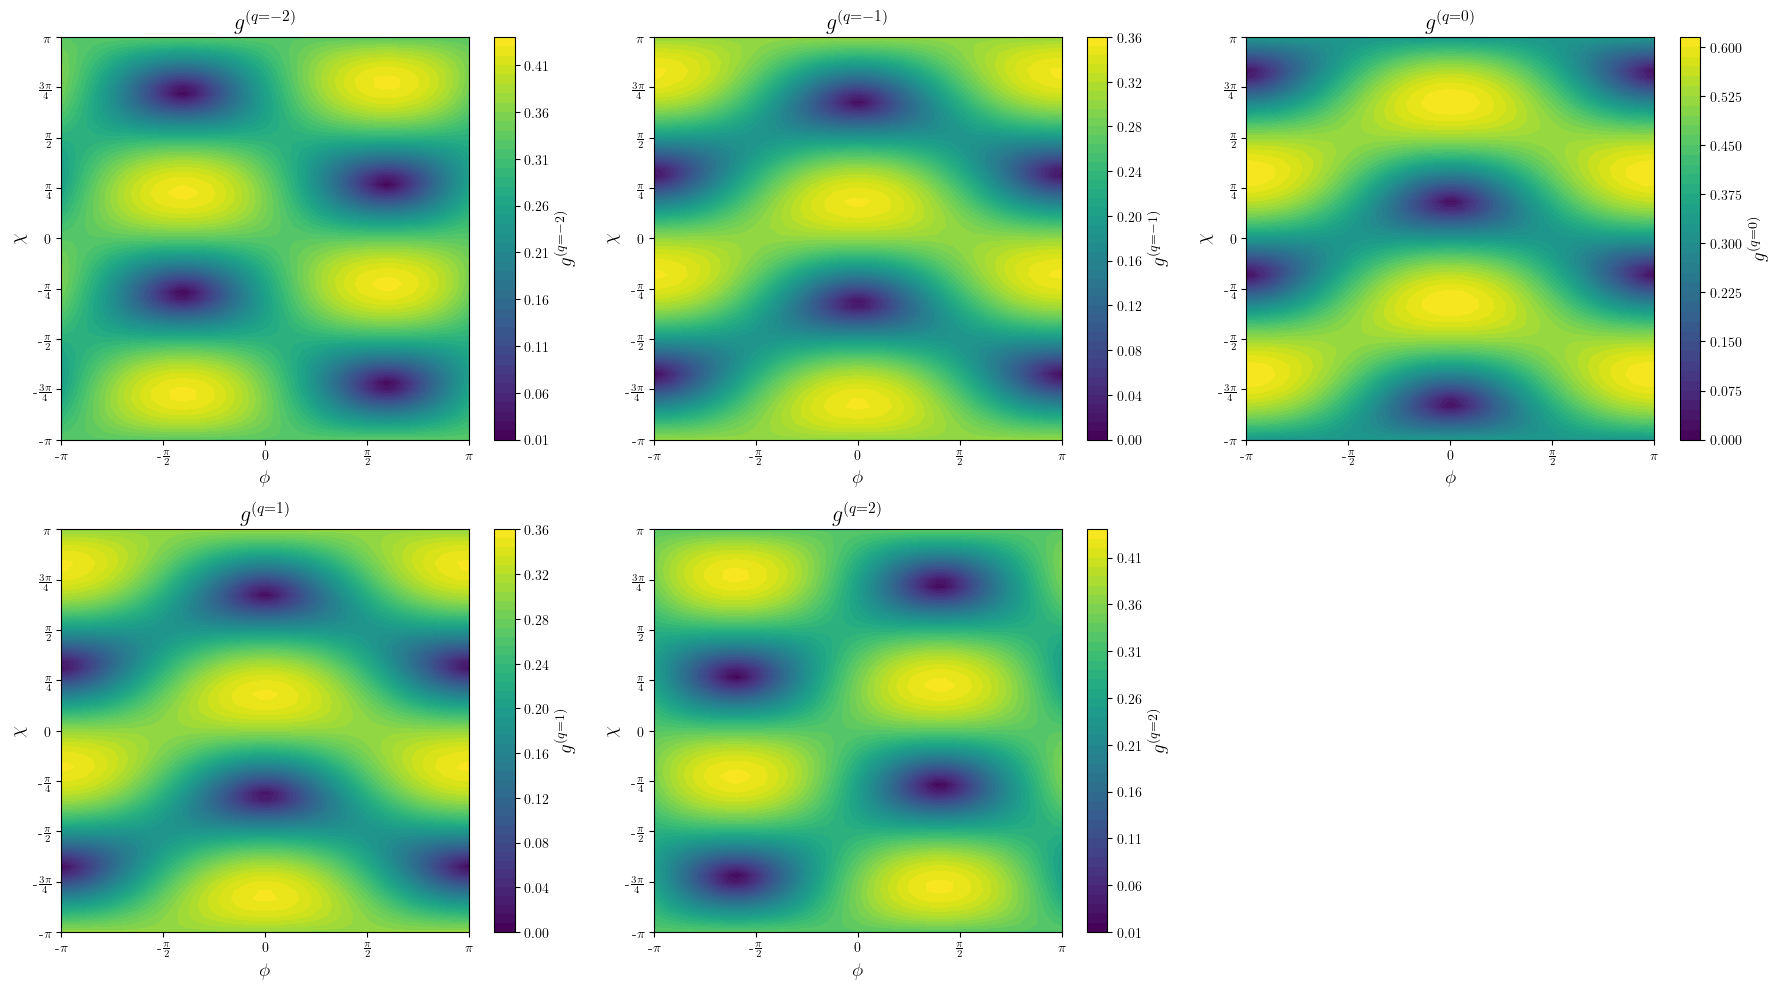

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Use LaTeX-style fonts
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True
# Define theta arrays and create meshgrid
theta_k_array = np.linspace(0, 90, 100)  # in degrees
theta_p_array = np.linspace(0, 90, 100)  # in degrees

TK, TP = np.meshgrid(theta_k_array, theta_p_array)

# Convert angles from degrees to radians
tk = TK * np.pi / 180
tp = TP * np.pi / 180
tk = 45 * np.pi / 180
tp = 58 * np.pi / 180

# Define phase and kai ranges
phase_array = np.linspace(-np.pi, np.pi, 50)
kai_array = np.linspace(-np.pi, np.pi , 50)

# Initialize g array with shape (5, len(kai_array), len(phase_array))
g = np.zeros((5, len(kai_array), len(phase_array)), dtype=complex)

# Iterate over phase and kai values
for idx_phase, phase_val in enumerate(phase_array):
    for idx_kai, kai_val in enumerate(kai_array):

        # Equation g_0
        g[2, idx_kai, idx_phase] = -np.sqrt(3 / 2) * np.cos(tk) * np.sin(tk) * (
            np.cos(tp) * np.cos(kai_val) - np.exp(1j * phase_val) * np.sin(tp) * np.sin(kai_val)
        )

        # Equation g_p1
        g[3, idx_kai, idx_phase] = 0.5 * (
            np.cos(kai_val) * (-np.cos(2 * tk) * np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) +
            np.exp(1j * phase_val) * (1j * np.cos(tk) * np.cos(tp) + np.cos(2 * tk) * np.sin(tp)) * np.sin(kai_val)
        )

        # Equation g_n1
        g[1, idx_kai, idx_phase] = 0.5 * (
            np.cos(kai_val) * (np.cos(2 * tk) * np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) +
            1j * np.exp(1j * phase_val) * (np.cos(tk) * np.cos(tp) + 1j * np.cos(2 * tk) * np.sin(tp)) * np.sin(kai_val)
        )

        # Equation g_p2
        g[4, idx_kai, idx_phase] = 0.5 * np.sin(tk) * (
            np.cos(kai_val) * (np.cos(tk) * np.cos(tp) - 1j * np.sin(tp)) +
            (-1j * np.cos(phase_val) + np.sin(phase_val)) * (np.cos(tp) - 1j * np.cos(tk) * np.sin(tp)) * np.sin(kai_val)
        )

        # Equation g_n2
        g[0, idx_kai, idx_phase] = np.abs(0.5 * np.sin(tk) * (
            np.cos(kai_val) * (np.cos(tk) * np.cos(tp) + 1j * np.sin(tp)) +
            1j * np.exp(1j * phase_val) * (np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) * np.sin(kai_val)
        ))

# Define a function to format ticks as multiples of pi
def pi_formatter(x, pos):
    frac = x / np.pi
    if np.isclose(frac, 0): return r"$0$"
    elif np.isclose(frac, 1): return r"$\pi$"
    elif np.isclose(frac, -1): return r"-$\pi$"
    elif np.isclose(frac, 0.5): return r"$\frac{\pi}{2}$"
    elif np.isclose(frac, -0.5): return r"-$\frac{\pi}{2}$"
    elif np.isclose(frac, 0.75): return r"$\frac{3\pi}{4}$"
    elif np.isclose(frac, -0.75): return r"-$\frac{3\pi}{4}$"
    elif np.isclose(frac, 0.25): return r"$\frac{\pi}{4}$"
    elif np.isclose(frac, -0.25): return r"-$\frac{\pi}{4}$"
    elif np.isclose(frac, 2): return r"$2\pi$"
    return r"${:.0f}\pi$".format(frac) if frac % 1 == 0 else r"${:.0f}\pi/2$".format(2 * frac)

# Set up the plotting area
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Labels for each subplot
g_label = [
    r'$g^{(q = -2)}$', r'$g^{(q = -1)}$', 
    r'$g^{(q = 0)}$', r'$g^{(q = 1)}$', r'$g^{(q = 2)}$'
]

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each g component
for q in range(5):
    magnitude = np.abs(g[q, :, :])  # Compute the magnitude

    # Create a contour plot with phase and kai axes
    cp = axs[q].contourf(phase_array, kai_array, magnitude, levels=50, cmap='viridis')
    cbar = fig.colorbar(cp, ax=axs[q])
    cbar.set_label(g_label[q], fontsize=14)  # Set colorbar label size

    # Set titles and axis labels with larger font size
    axs[q].set_title(g_label[q], fontsize=16)
    axs[q].set_xlabel(r'$\phi$', fontsize=14)
    axs[q].set_ylabel(r'$\chi$', fontsize=14)


    # Set x and y axis ticks to show in terms of pi
    axs[q].xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
    axs[q].xaxis.set_major_formatter(FuncFormatter(pi_formatter))
    axs[q].yaxis.set_major_locator(MultipleLocator(base=np.pi / 4))
    axs[q].yaxis.set_major_formatter(FuncFormatter(pi_formatter))

# Hide the unused sixth subplot
axs[5].axis('off')


plt.tight_layout()
# plt.savefig()
plt.show()




In [25]:
%matplotlib widget

Optimized parameters:
Theta_k: 42.47 degrees, Theta_p: 45.00 degrees, Kai: 13.77 degrees, Phase: 0.00 degrees


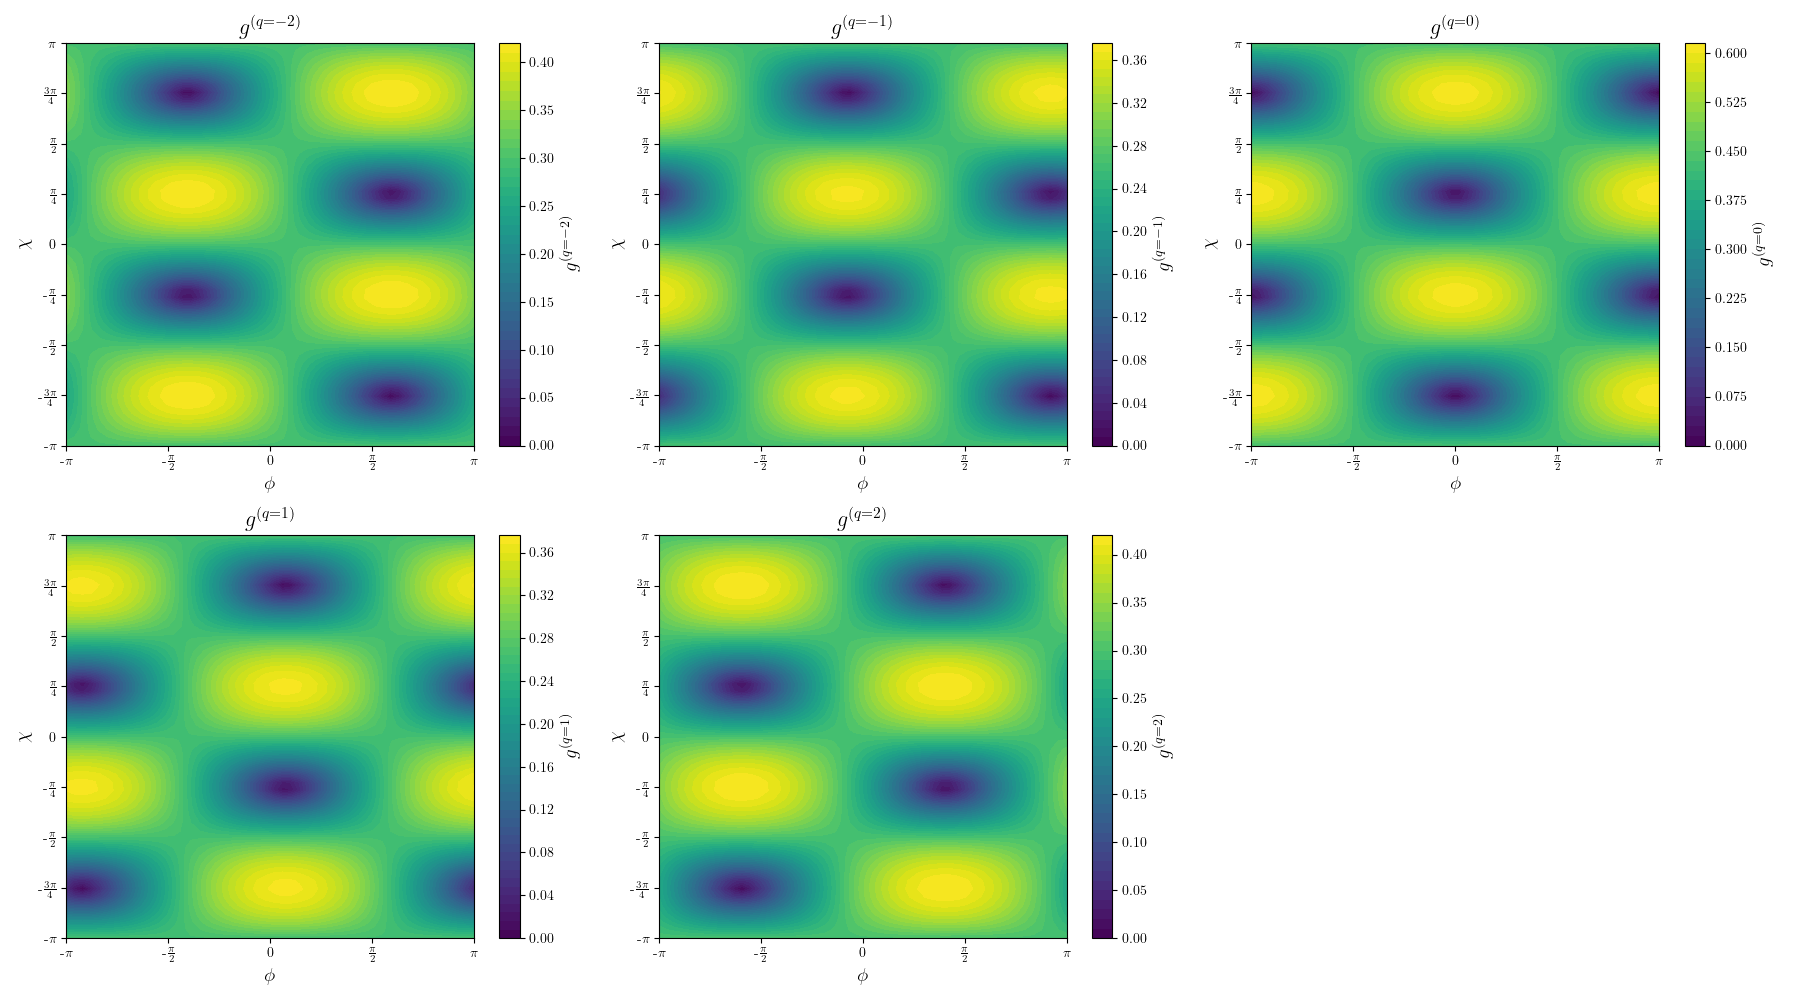

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, FuncFormatter
from scipy.optimize import minimize

# Use LaTeX-style fonts
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Define theta arrays and create meshgrid
theta_k_array = np.linspace(0, 90, 100)  # in degrees
theta_p_array = np.linspace(0, 90, 100)  # in degrees
TK, TP = np.meshgrid(theta_k_array, theta_p_array)

# Convert angles from degrees to radians
def calculate_geometric_factors(tk_deg, tp_deg, kai, phase):
    tk = tk_deg * np.pi / 180
    tp = tp_deg * np.pi / 180
    g = np.zeros(5, dtype=complex)

    # Calculate each g component
    g[2] = -np.sqrt(3 / 2) * np.cos(tk) * np.sin(tk) * (
        np.cos(tp) * np.cos(kai) - np.exp(1j * phase) * np.sin(tp) * np.sin(kai)
    )
    g[3] = 0.5 * (
        np.cos(kai) * (-np.cos(2 * tk) * np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) +
        np.exp(1j * phase) * (1j * np.cos(tk) * np.cos(tp) + np.cos(2 * tk) * np.sin(tp)) * np.sin(kai)
    )
    g[1] = 0.5 * (
        np.cos(kai) * (np.cos(2 * tk) * np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) +
        1j * np.exp(1j * phase) * (np.cos(tk) * np.cos(tp) + 1j * np.cos(2 * tk) * np.sin(tp)) * np.sin(kai)
    )
    g[4] = 0.5 * np.sin(tk) * (
        np.cos(kai) * (np.cos(tk) * np.cos(tp) - 1j * np.sin(tp)) +
        (-1j * np.cos(phase) + np.sin(phase)) * (np.cos(tp) - 1j * np.cos(tk) * np.sin(tp)) * np.sin(kai)
    )
    g[0] = 0.5 * np.sin(tk) * (
        np.cos(kai) * (np.cos(tk) * np.cos(tp) + 1j * np.sin(tp)) +
        1j * np.exp(1j * phase) * (np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) * np.sin(kai)
    )

    return np.abs(g)  

# Objective function to match geometric factor ratios
def objective(params, target_ratios):
    tk_deg, tp_deg, kai, phase = params
    g_values = calculate_geometric_factors(tk_deg, tp_deg, kai, phase)
    normed_g = g_values / np.linalg.norm(g_values)
    target_ratios_normed = target_ratios / np.linalg.norm(target_ratios)
    error = np.sum((normed_g - target_ratios_normed) ** 2)
    return error

# Function to find parameter values for target ratios
def find_parameters(target_ratios, initial_guess=[45, 45, 0, 0]):
    result = minimize(objective, initial_guess, args=(target_ratios), bounds=[(0, 90), (0, 90), (-np.pi, np.pi), (-np.pi, np.pi)])
    return result.x if result.success else None

# Example target ratios (you can adjust this)
target_ratios = np.array([1, 1, 1, 1, 1])
params = find_parameters(target_ratios)

if params is not None:
    print("Optimized parameters:")
    print(f"Theta_k: {params[0]:.2f} degrees, Theta_p: {params[1]:.2f} degrees, Kai: {params[2]*180/np.pi:.2f} degrees, Phase: {params[3]*180/np.pi:.2f} degrees")
else:
    print("No solution found for the given ratio.")

# Plotting results
phase_array = np.linspace(-np.pi, np.pi, 50)
kai_array = np.linspace(-np.pi, np.pi, 50)
g = np.zeros((5, len(kai_array), len(phase_array)), dtype=complex)

# Calculate g for the optimized parameters
for idx_phase, phase_val in enumerate(phase_array):
    for idx_kai, kai_val in enumerate(kai_array):
        g[:, idx_kai, idx_phase] = calculate_geometric_factors(params[0], params[1], kai_val, phase_val)

# Define a function to format ticks as multiples of pi
def pi_formatter(x, pos):
    frac = x / np.pi
    if np.isclose(frac, 0): return r"$0$"
    elif np.isclose(frac, 1): return r"$\pi$"
    elif np.isclose(frac, -1): return r"-$\pi$"
    elif np.isclose(frac, 0.5): return r"$\frac{\pi}{2}$"
    elif np.isclose(frac, -0.5): return r"-$\frac{\pi}{2}$"
    elif np.isclose(frac, 0.75): return r"$\frac{3\pi}{4}$"
    elif np.isclose(frac, -0.75): return r"-$\frac{3\pi}{4}$"
    elif np.isclose(frac, 0.25): return r"$\frac{\pi}{4}$"
    elif np.isclose(frac, -0.25): return r"-$\frac{\pi}{4}$"
    elif np.isclose(frac, 2): return r"$2\pi$"
    return r"${:.0f}\pi$".format(frac) if frac % 1 == 0 else r"${:.0f}\pi/2$".format(2 * frac)

# Set up the plotting area
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
g_label = [
    r'$g^{(q = -2)}$', r'$g^{(q = -1)}$', 
    r'$g^{(q = 0)}$', r'$g^{(q = 1)}$', r'$g^{(q = 2)}$'
]
axs = axs.flatten()

for q in range(5):
    magnitude = np.abs(g[q, :, :])
    cp = axs[q].contourf(phase_array, kai_array, magnitude, levels=50, cmap='viridis')
    cbar = fig.colorbar(cp, ax=axs[q])
    cbar.set_label(g_label[q], fontsize=14)
    axs[q].set_title(g_label[q], fontsize=16)
    axs[q].set_xlabel(r'$\phi$', fontsize=14)
    axs[q].set_ylabel(r'$\chi$', fontsize=14)
    axs[q].xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
    axs[q].xaxis.set_major_formatter(FuncFormatter(pi_formatter))
    axs[q].yaxis.set_major_locator(MultipleLocator(base=np.pi / 4))
    axs[q].yaxis.set_major_formatter(FuncFormatter(pi_formatter))

axs[5].axis('off')
plt.tight_layout()
plt.show()


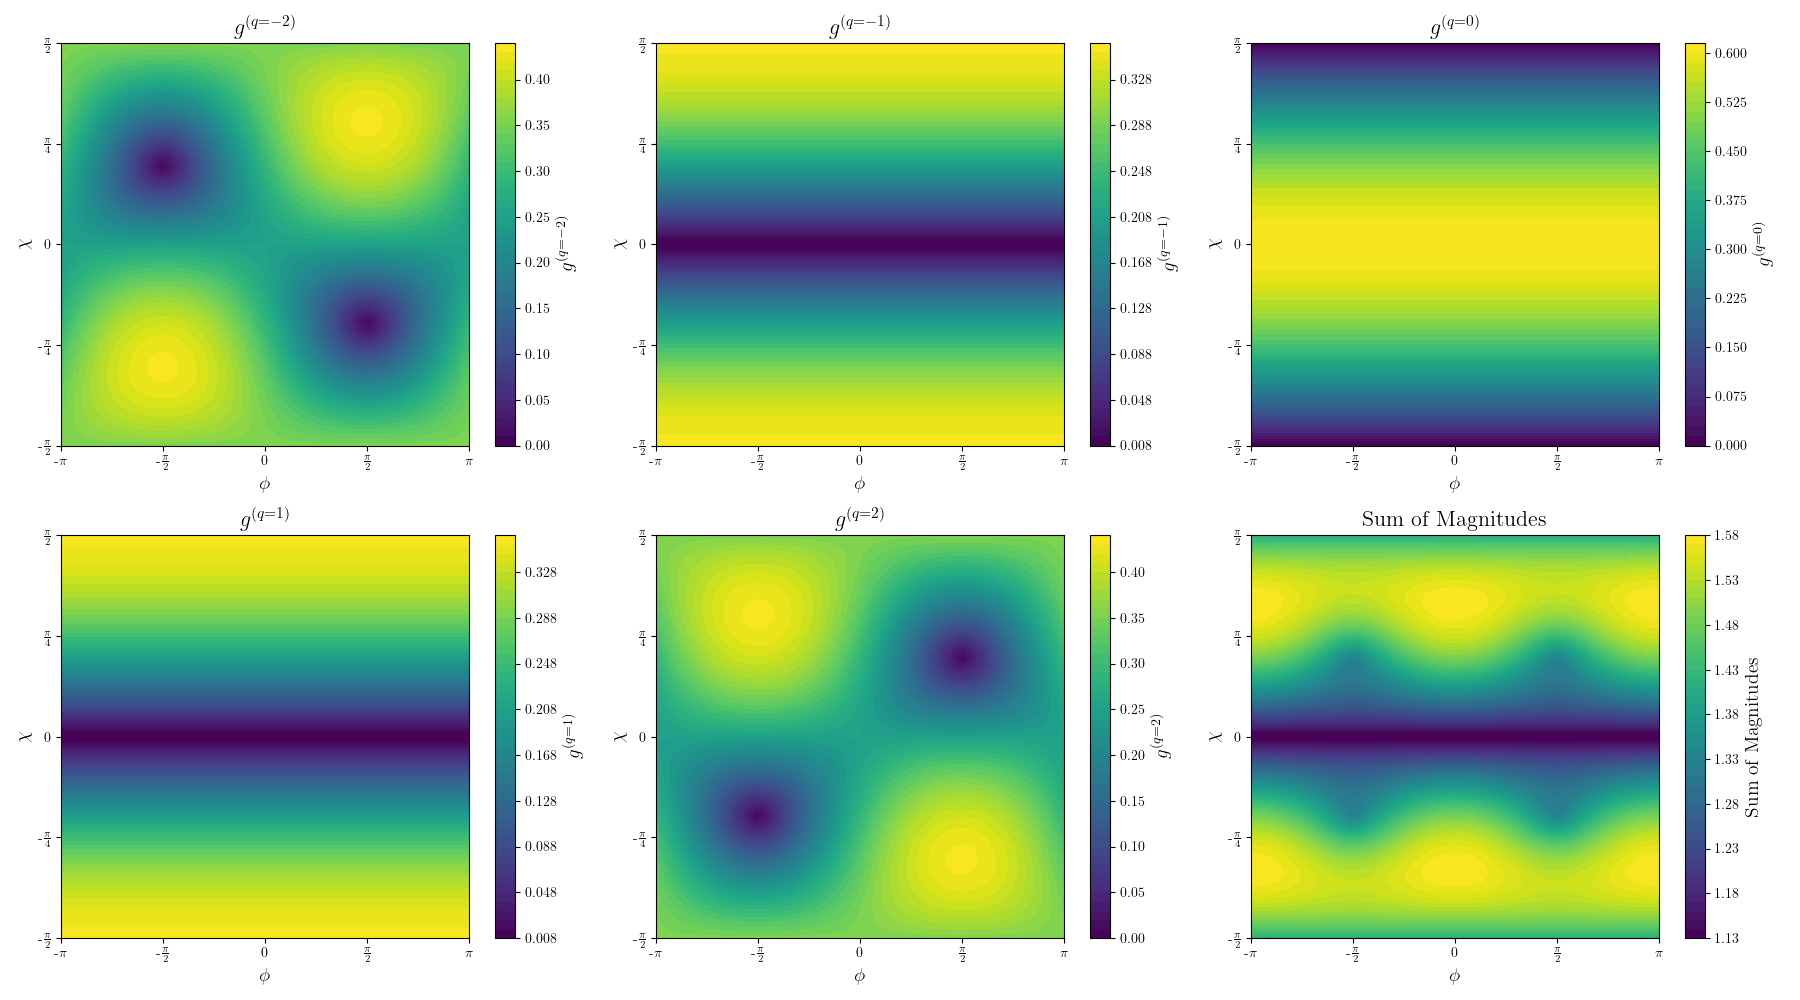

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, FuncFormatter

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

theta_k = 45 * np.pi / 180
phase_array = np.linspace(-np.pi, np.pi, 50)
chi_array = np.linspace(-np.pi/2, np.pi/2, 50)

g = np.zeros((5, len(chi_array), len(phase_array)), dtype=complex)

for i_phi, phi in enumerate(phase_array):
    for i_chi, chi in enumerate(chi_array):
        g[2, i_chi, i_phi] = -np.sqrt(3 / 2) * np.cos(theta_k) * np.cos(chi) * np.sin(theta_k)
        g[3, i_chi, i_phi] = 0.5 * (np.cos(2 * theta_k) * np.cos(chi) + 1j * np.exp(1j * phi) * np.cos(theta_k) * np.sin(chi))
        g[1, i_chi, i_phi] = 0.5 * (-np.cos(2 * theta_k) * np.cos(chi) + 1j * np.exp(1j * phi) * np.cos(theta_k) * np.sin(chi))
        g[4, i_chi, i_phi] = 0.5 * np.sin(theta_k) * (np.cos(theta_k) * np.cos(chi) + 1j * np.exp(1j * phi) * np.sin(chi))
        g[0, i_chi, i_phi] = 0.5 * np.sin(theta_k) * (np.cos(theta_k) * np.cos(chi) - 1j * np.exp(1j * phi) * np.sin(chi))

def pi_formatter(x, pos):
    frac = x / np.pi
    if np.isclose(frac, 0): return r"$0$"
    if np.isclose(frac, 1): return r"$\pi$"
    if np.isclose(frac, -1): return r"-$\pi$"
    if np.isclose(frac, 0.5): return r"$\frac{\pi}{2}$"
    if np.isclose(frac, -0.5): return r"-$\frac{\pi}{2}$"
    if np.isclose(frac, 0.75): return r"$\frac{3\pi}{4}$"
    if np.isclose(frac, -0.75): return r"-$\frac{3\pi}{4}$"
    if np.isclose(frac, 0.25): return r"$\frac{\pi}{4}$"
    if np.isclose(frac, -0.25): return r"-$\frac{\pi}{4}$"
    if np.isclose(frac, 2): return r"$2\pi$"
    return r"${:.0f}\pi$".format(frac) if frac % 1 == 0 else r"${:.0f}\pi/2$".format(2 * frac)

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

labels = [
    r'$g^{(q = -2)}$', r'$g^{(q = -1)}$', 
    r'$g^{(q = 0)}$', r'$g^{(q = 1)}$', 
    r'$g^{(q = 2)}$', r'Sum of Magnitudes'
]

for q in range(5):
    mag = np.abs(g[q])
    cp = axs[q].contourf(phase_array, chi_array, mag, levels=50, cmap='viridis')
    fig.colorbar(cp, ax=axs[q]).set_label(labels[q], fontsize=14)
    axs[q].set_title(labels[q], fontsize=16)
    axs[q].set_xlabel(r'$\phi$', fontsize=14)
    axs[q].set_ylabel(r'$\chi$', fontsize=14)
    axs[q].xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
    axs[q].xaxis.set_major_formatter(FuncFormatter(pi_formatter))
    axs[q].yaxis.set_major_locator(MultipleLocator(base=np.pi / 4))
    axs[q].yaxis.set_major_formatter(FuncFormatter(pi_formatter))

sum_mag = np.sum(np.abs(g), axis=0)
cp = axs[5].contourf(phase_array, chi_array, sum_mag, levels=50, cmap='viridis')
fig.colorbar(cp, ax=axs[5]).set_label(labels[5], fontsize=14)
axs[5].set_title(labels[5], fontsize=16)
axs[5].set_xlabel(r'$\phi$', fontsize=14)
axs[5].set_ylabel(r'$\chi$', fontsize=14)
axs[5].xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
axs[5].xaxis.set_major_formatter(FuncFormatter(pi_formatter))
axs[5].yaxis.set_major_locator(MultipleLocator(base=np.pi / 4))
axs[5].yaxis.set_major_formatter(FuncFormatter(pi_formatter))

plt.tight_layout()
plt.show()


In [89]:
calculate_geometric_factors(45,58,-np.pi,np.pi/4)

array([0.32779429, 0.29983028, 0.32450795, 0.29983028, 0.32779429])

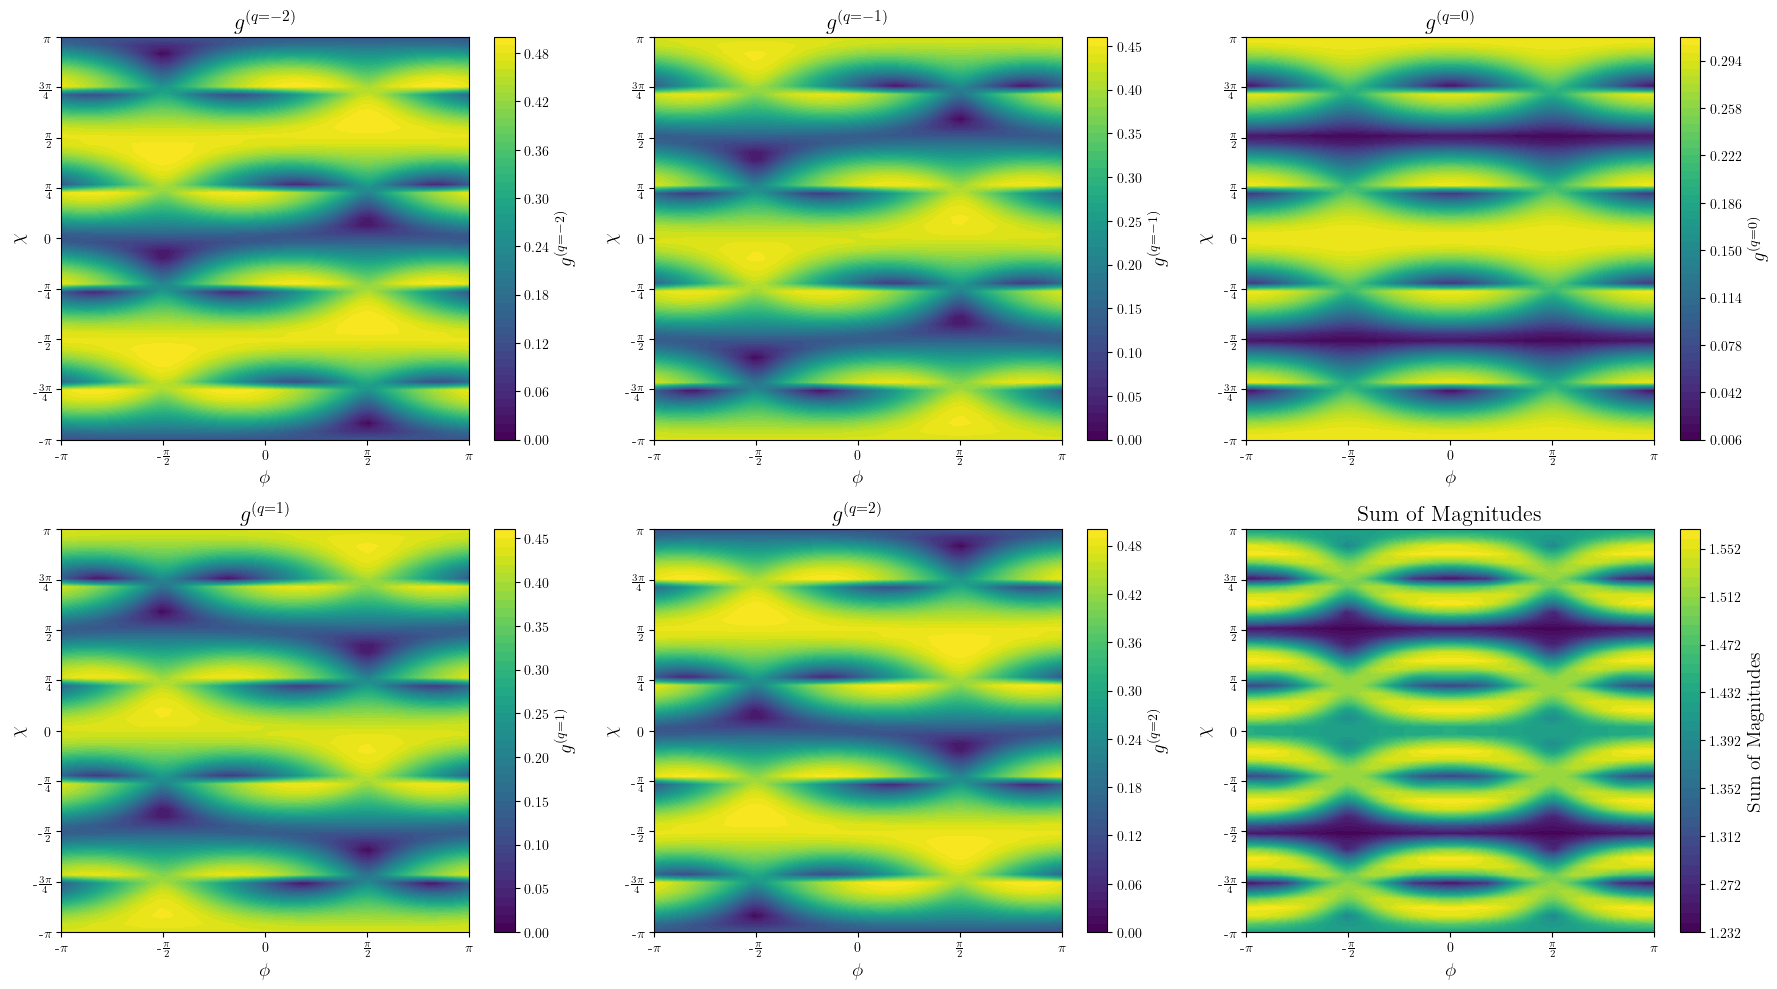

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Use LaTeX-style fonts
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Define theta arrays and create meshgrid
theta_k_array = np.linspace(0, 90, 100)  # in degrees
theta_p_array = np.linspace(0, 90, 100)  # in degrees

TK, TP = np.meshgrid(theta_k_array, theta_p_array)

# Convert angles from degrees to radians
tk = TK * np.pi / 180
tp = TP * np.pi / 180
tk = 75 * np.pi / 180


# Define phase and kai ranges
phase_array = np.linspace(-np.pi, np.pi, 50)
kai_array = np.linspace(-np.pi, np.pi , 50)

# Initialize g array with shape (5, len(kai_array), len(phase_array))
g = np.zeros((5, len(kai_array), len(phase_array)), dtype=complex)

# Iterate over phase and kai values
for idx_phase, phase_val in enumerate(phase_array):
    for idx_kai, kai_val in enumerate(kai_array):
        # Equation g_0
        tp = 0.5*np.arctan(np.tan(2*kai_val)*np.cos(phase_val))
        g[2, idx_kai, idx_phase] = -np.sqrt(3 / 2) * np.cos(tk) * np.sin(tk) * (
            np.cos(tp) * np.cos(kai_val) - np.exp(1j * phase_val) * np.sin(tp) * np.sin(kai_val)
        )

        # Equation g_p1
        g[3, idx_kai, idx_phase] = 0.5 * (
            np.cos(kai_val) * (-np.cos(2 * tk) * np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) +
            np.exp(1j * phase_val) * (1j * np.cos(tk) * np.cos(tp) + np.cos(2 * tk) * np.sin(tp)) * np.sin(kai_val)
        )

        # Equation g_n1
        g[1, idx_kai, idx_phase] = 0.5 * (
            np.cos(kai_val) * (np.cos(2 * tk) * np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) +
            1j * np.exp(1j * phase_val) * (np.cos(tk) * np.cos(tp) + 1j * np.cos(2 * tk) * np.sin(tp)) * np.sin(kai_val)
        )

        # Equation g_p2
        g[4, idx_kai, idx_phase] = 0.5 * np.sin(tk) * (
            np.cos(kai_val) * (np.cos(tk) * np.cos(tp) - 1j * np.sin(tp)) +
            (-1j * np.cos(phase_val) + np.sin(phase_val)) * (np.cos(tp) - 1j * np.cos(tk) * np.sin(tp)) * np.sin(kai_val)
        )

        # Equation g_n2
        g[0, idx_kai, idx_phase] = np.abs(0.5 * np.sin(tk) * (
            np.cos(kai_val) * (np.cos(tk) * np.cos(tp) + 1j * np.sin(tp)) +
            1j * np.exp(1j * phase_val) * (np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) * np.sin(kai_val)
        ))

# Define a function to format ticks as multiples of pi
def pi_formatter(x, pos):
    frac = x / np.pi
    if np.isclose(frac, 0): return r"$0$"
    elif np.isclose(frac, 1): return r"$\pi$"
    elif np.isclose(frac, -1): return r"-$\pi$"
    elif np.isclose(frac, 0.5): return r"$\frac{\pi}{2}$"
    elif np.isclose(frac, -0.5): return r"-$\frac{\pi}{2}$"
    elif np.isclose(frac, 0.75): return r"$\frac{3\pi}{4}$"
    elif np.isclose(frac, -0.75): return r"-$\frac{3\pi}{4}$"
    elif np.isclose(frac, 0.25): return r"$\frac{\pi}{4}$"
    elif np.isclose(frac, -0.25): return r"-$\frac{\pi}{4}$"
    elif np.isclose(frac, 2): return r"$2\pi$"
    return r"${:.0f}\pi$".format(frac) if frac % 1 == 0 else r"${:.0f}\pi/2$".format(2 * frac)

# Set up the plotting area
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Labels for each subplot
g_label = [
    r'$g^{(q = -2)}$', r'$g^{(q = -1)}$', 
    r'$g^{(q = 0)}$', r'$g^{(q = 1)}$', r'$g^{(q = 2)}$', r'Sum of Magnitudes'
]

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each g component
for q in range(5):
    magnitude = np.abs(g[q, :, :])  # Compute the magnitude

    # Create a contour plot with phase and kai axes
    cp = axs[q].contourf(phase_array, kai_array, magnitude, levels=50, cmap='viridis')
    cbar = fig.colorbar(cp, ax=axs[q])
    cbar.set_label(g_label[q], fontsize=14)  # Set colorbar label size

    # Set titles and axis labels with larger font size
    axs[q].set_title(g_label[q], fontsize=16)
    axs[q].set_xlabel(r'$\phi$', fontsize=14)
    axs[q].set_ylabel(r'$\chi$', fontsize=14)

    # Set x and y axis ticks to show in terms of pi
    axs[q].xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
    axs[q].xaxis.set_major_formatter(FuncFormatter(pi_formatter))
    axs[q].yaxis.set_major_locator(MultipleLocator(base=np.pi / 4))
    axs[q].yaxis.set_major_formatter(FuncFormatter(pi_formatter))

# Calculate the sum of magnitudes for the sixth plot
sum_magnitude = np.sum(np.abs(g), axis=0)

# Create the sixth plot for the sum of magnitudes
cp = axs[5].contourf(phase_array, kai_array, sum_magnitude, levels=50, cmap='viridis')
cbar = fig.colorbar(cp, ax=axs[5])
cbar.set_label(g_label[5], fontsize=14)  # Set colorbar label size

# Set title and axis labels for the sixth plot
axs[5].set_title(g_label[5], fontsize=16)
axs[5].set_xlabel(r'$\phi$', fontsize=14)
axs[5].set_ylabel(r'$\chi$', fontsize=14)

# Set x and y axis ticks to show in terms of pi
axs[5].xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
axs[5].xaxis.set_major_formatter(FuncFormatter(pi_formatter))
axs[5].yaxis.set_major_locator(MultipleLocator(base=np.pi / 4))
axs[5].yaxis.set_major_formatter(FuncFormatter(pi_formatter))

plt.tight_layout()
plt.show()


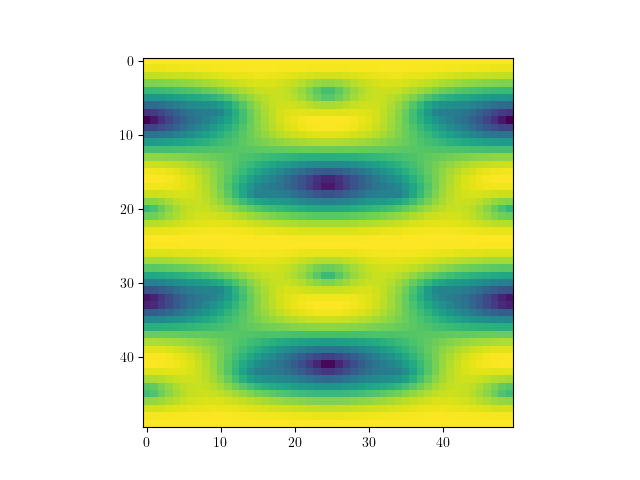

In [121]:
plt.figure()
plt.imshow(sum(np.abs(g)))
plt.show()

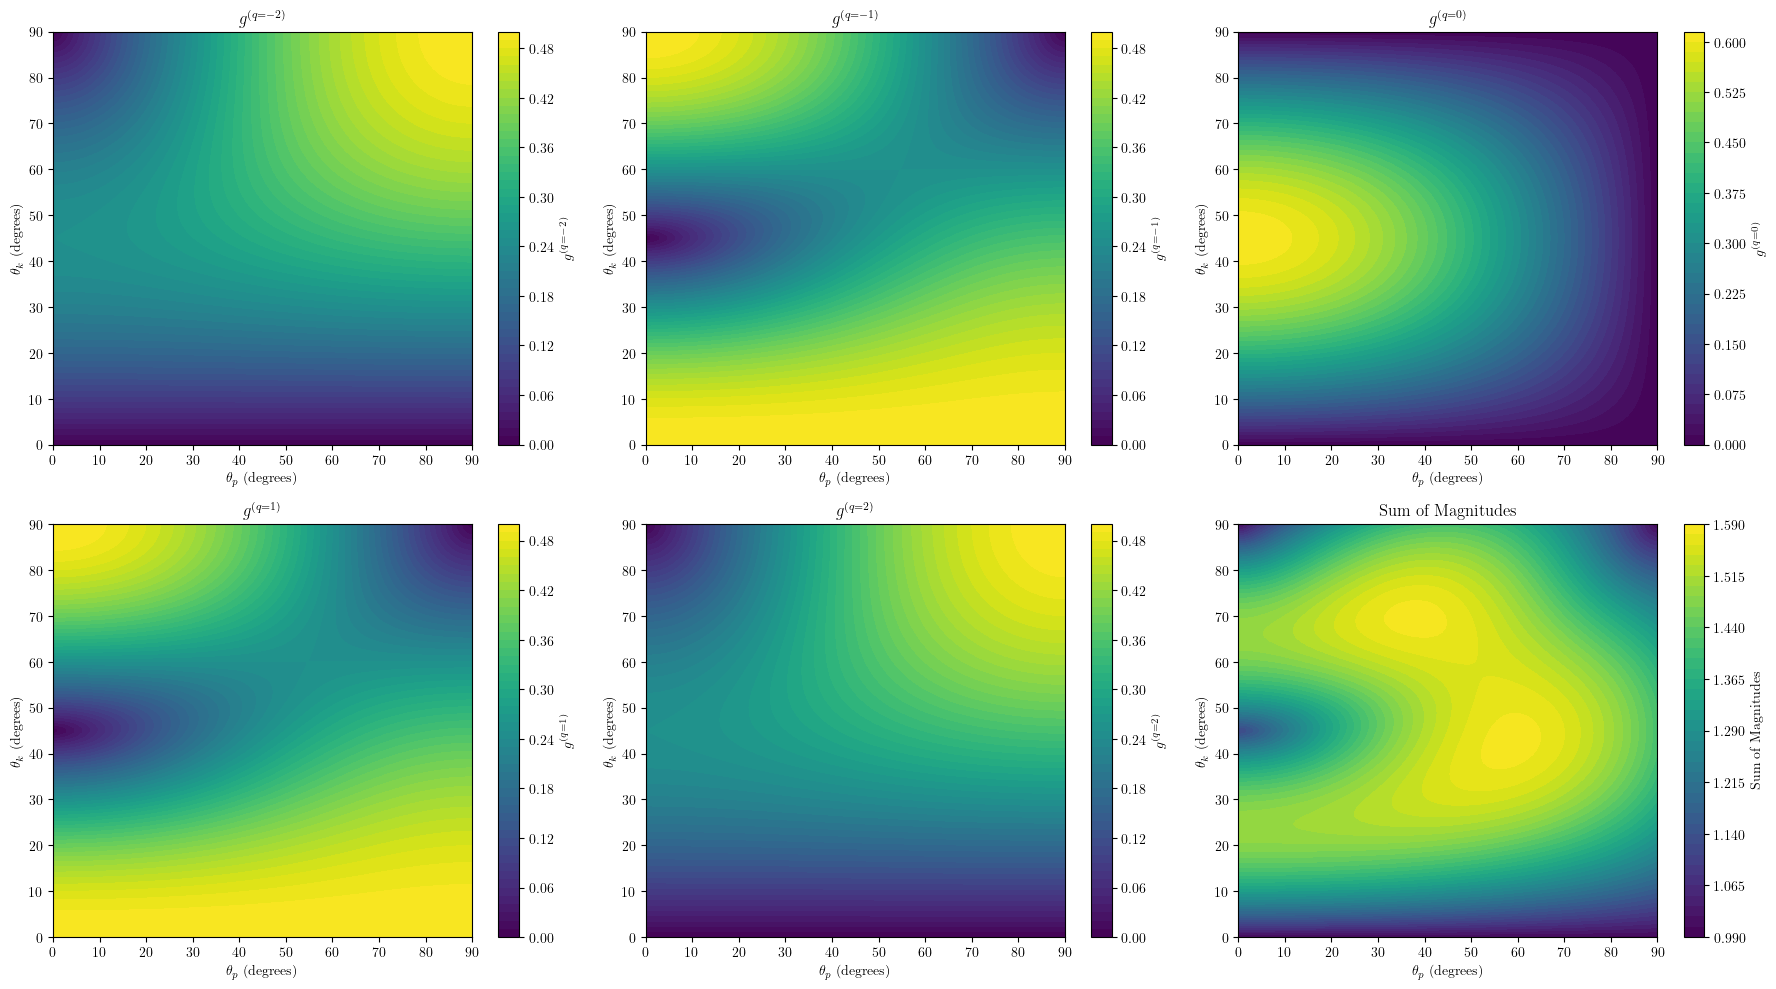

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define theta arrays and create a meshgrid for tp and tk in radians
theta_k_array = np.linspace(0, 90, 100)  # in degrees
theta_p_array = np.linspace(0, 90, 100)  # in degrees

TK, TP = np.meshgrid(theta_k_array, theta_p_array)

# Convert angles from degrees to radians
tk = TK * np.pi / 180
tp = TP * np.pi / 180

# Calculate each q component
q_p2 = (1/4) * np.abs(np.cos(tp) * np.sin(2 * tk) - 2j * np.sin(tp) * np.sin(tk))
q_p1 = (1/2) * np.abs(1j * np.sin(tp) * np.cos(tk) - np.cos(tp) * np.cos(2 * tk))
q_p0 = (np.sqrt(6) / 4) * np.abs(np.cos(tp) * np.sin(2 * tk))
q_n1 = (1/2) * np.abs(1j * np.sin(tp) * np.cos(tk) + np.cos(tp) * np.cos(2 * tk))
q_n2 = (1/4) * np.abs(np.cos(tp) * np.sin(2 * tk) - 2j * np.sin(tp) * np.sin(tk))

# Store the components in an array for easy access
G = [q_n2, q_n1, q_p0, q_p1, q_p2]

# Sum of all q components for the sixth plot
G_sum = q_n2 + q_n1 + q_p0 + q_p1 + q_p2

# Labels for each plot
g_label = [r'$g^{(q = -2)}$', r'$g^{(q = -1)}$', r'$g^{(q = 0)}$', r'$g^{(q = 1)}$', r'$g^{(q = 2)}$', r'Sum of Magnitudes']

# Plotting each component and the sum
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i in range(5):
    # Create a contour plot for each q component
    cp = axs[i].contourf(TP, TK, G[i], levels=50, cmap='viridis')
    fig.colorbar(cp, ax=axs[i], label=g_label[i])
    axs[i].set_title(g_label[i])
    axs[i].set_xlabel(r'$\theta_p$ (degrees)')
    axs[i].set_ylabel(r'$\theta_k$ (degrees)')

# Create the sixth plot for the sum of all components
cp = axs[5].contourf(TP, TK, G_sum, levels=50, cmap='viridis')
fig.colorbar(cp, ax=axs[5], label=g_label[5])
axs[5].set_title(g_label[5])
axs[5].set_xlabel(r'$\theta_p$ (degrees)')
axs[5].set_ylabel(r'$\theta_k$ (degrees)')

plt.tight_layout()
plt.show()
